In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


def import_ph_data(folder: str, q_unit: str) -> np.ndarray:
    """
    Import phase‐position data from a .PH file.

    Each entry is a float64 in [0,1], where
      0 → 0° and 1 → 360° of the AC cycle.

    Args:
        folder: path to the directory containing the .PH file
        q_unit: base filename (without “.PH”) to open

    Returns:
        phase: 1D NumPy array of float64 phase positions
    """
    path = os.path.join(folder, f"{q_unit}.PH")
    if not os.path.isfile(path):
        raise FileNotFoundError(f"No such file: {path}")

    # Option 1: fast direct read
    phase = np.fromfile(path, dtype='<f8')

    # If you ever need degrees instead of fraction:
    # phase_degrees = phase * 360.0

    return phase


In [2]:
# Ask the user for a path (e.g. C:\Users\you\Documents\report.pdf)
filepath_str = input("Enter the full file path: ").strip().strip('"')

# Convert the string to a Path object
filepath = Path(filepath_str)

# Extract the directory (parent) and the file name separately
folder   = filepath.parent          # PosixPath or WindowsPath object
filename = filepath.name            # Just the file’s name with extension

print(f"Folder : {folder}")
print(f"Filename: {filename}")

phase = import_ph_data(folder, filename.removesuffix('.PH'))
print(phase.shape)        # e.g. (123456,)
print(phase)

# convert to degrees if desired
phase_deg = phase * 360.0
print(phase_deg[:10])

Folder : C:\Users\sapierso\Box\PD-Acoustic Project Data\3rd Party Export (MATLAB)\20250512_11h13m42s
Filename: MPD 800 2.1.1-20250416_12h33m10s365ms.PH
(9321125,)
[0.61341119 0.61379814 0.6140027  ... 0.79737771 0.79760331 0.79784244]
[220.82802773 220.96733093 221.04097366 221.20482445 221.31305695
 221.41983032 221.61629677 221.69371605 221.76418304 221.82778358]


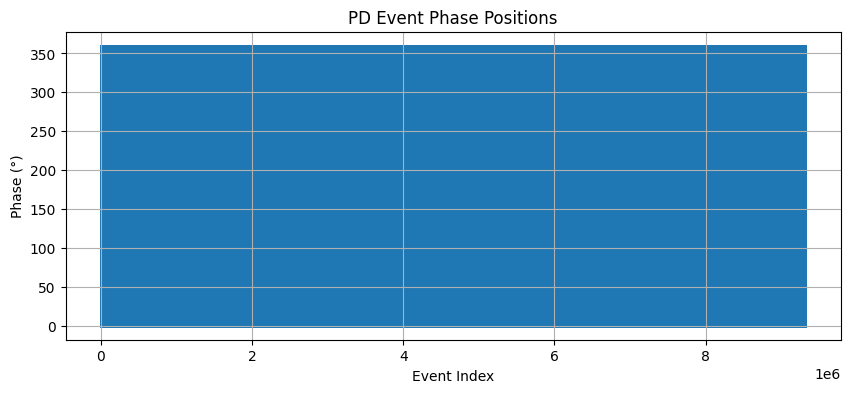

In [3]:
# assume `phase` is your 1D NumPy array from import_ph_data(...)
# e.g. phase = import_ph_data(folder, q_unit)

# x‐axis: event index
indices = np.arange(len(phase))

plt.figure(figsize=(10, 4))
plt.scatter(indices, phase_deg, s=5, alpha=0.7, marker='.')
plt.xlabel('Event Index')
plt.ylabel('Phase (°)')
plt.title('PD Event Phase Positions')
# plt.ylim(0, 360)
plt.grid(True)
plt.show()
